
```
# This is formatted as code
```
#**CC and VC Model**

Tony Kelly

The goal of this practical course is to use experimental and computational approaches to reinforce and expand upon some of the concepts taught in the ‘Intracellular Electrophysiology Recordings’ lecture by making the theoretical concepts tangible and interactive – & maybe fun.

### Computational Model
First we need to install NEURON and we will use the package installer for Python (pip). 

In [2]:
!pip install neuron

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 24.7 MB/s eta 0:00:00


This way adds scrips from my github repo.
could also try adding via link to local copy???

In [3]:
# Clone the entire repo.
#!git clone -l -s git://github.com/tonykelly00/bigs.git cloned-repo
!git clone -l -s  https://github.com/tonykelly00/bigs.git cloned-repo
%cd cloned-repo
!ls

!python BIGS_ephys.py

Cloning into 'cloned-repo'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 57 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), 353.93 KiB | 2.33 MiB/s, done.
/content/cloned-repo
BIGS_ephys.py  BIGS_Neuron_model.ipynb	README.md
--No graphics will be displayed.


We also need to load some basic scripts to make the work-flow more convienent.

In [4]:
from neuron import h, gui
import matplotlib.pyplot as plt

import numpy as np

from BIGS_ephys import mk_soma
from BIGS_ephys import run
from BIGS_ephys import attach_IC
from BIGS_ephys import attach_dend
from BIGS_ephys import attach_VC

create a cell and run. We create a cell with the mk_soma command that has a lenght and width of 20 microns.

Run() records the Vm from this cell for 250ms.

In [4]:
soma = mk_soma(20,20)

Done Running


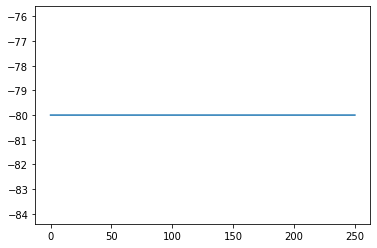

In [5]:
t_vec, v_vec = run(soma) #outputs time and somatic voltage so can plot 

# create the general figure
fig = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig.add_subplot(111)
Vm=ax1.plot(t_vec, v_vec,)

###Current-Clamp

Aim: To create a ball and stick model to determine our key parameters and examine their effect in current-clamp recordings

**Rin**

In a current-clamp experiment how do you measure the cells input resistance (Rin)?

Discuss before reading on...


attach a current injecting pipette at the soma


Done Running


Text(0, 0.5, 'Vm [mV]')

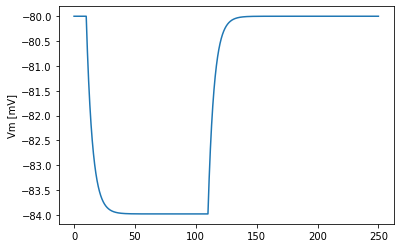

In [6]:
ic = attach_IC(soma)
t_vec, v_vec = run(soma) #outputs time and somatic voltage so can plot 

# create the general figure
fig = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec,)
plt.ylabel("Vm [mV]") 

Given that ic.amp is -0.01 nA. What is the Rin of the cell?

And how does this relate to the specific passive conductance soma(0.5).pas.g (S.cm^2 or specific membrane resistance rm 1/g = 5000 ohms.cm^2)

In [7]:
#prints injected current step [nA], specific membrane conductance [S.cm^2]
ic.amp, soma(0.5).pas.g

(-0.01, 0.0002)

What happens if you change the leak conductance?; soma(0.5).pas.g

Done Running


Text(0, 0.5, 'Vm [mV]')

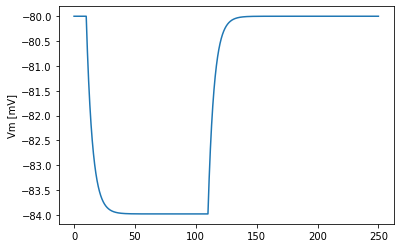

In [8]:
#increase or decrease 0.0002
soma(0.5).pas.g = 0.0002

t_vec, v_vec = run(soma) #outputs time and somatic voltage so can plot 

# create the general figure
fig = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec,)
plt.ylabel("Vm [mV]")

For discussion of converting specific membrane resitance (Rm)) to Rin see https://www.neuron.yale.edu/phpBB/viewtopic.php?f=8&t=2822
      
        rm = Rin [*106 (scaling for  mega)] * surface area [*10-8 (scaling for um2 to cm2)] 
         = rm / surface area [4*pie*R^2] [*10-8 (scaling for um2 to cm2)

In [9]:
#Rin in mOhms
(1/soma(0.5).pas.g)/(4*3.14*10**2) * (1e2)

398.0891719745223

**Tau**

In current-clamp experiments what is the membrane time constant and how do you measure it?
What membrane properties determine tau?



Membrane time constant Tau is estimated as time voltage changes to 66% of it's final value => 5ms


(5.0, 30.0)

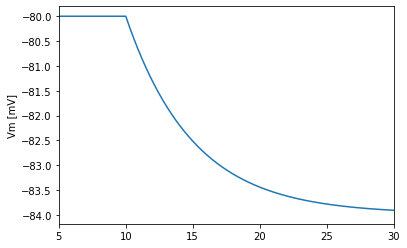

In [10]:
# create the general figure
fig = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec,)
plt.ylabel("Vm [mV]")
ax1.set_xlim([5,30])

Or in the model calculated from:
cell area x specific Capacitace/cm^2 = total Cin
And Rin x Cin = tau

		cell area [h.area(0.5)=1256um^2} * 1uF/cm^2	=> 1256 (1e-8) * 1 (1e-6) = 12.56pF

		400mOhms * .012 nF = ~5ms

In [11]:
Rin= (1/soma(0.5).pas.g)/(4*3.14*10**2) * (1e2)
h.area(0.5) * (1e-8)  * 1 * (1e-6) * Rin * (1e3)

5.002536072595212e-06

**Dendrites**

Attach a dendrite: 


In [12]:
soma = mk_soma(20,20)
ic = attach_IC(soma)
dend = attach_dend(soma, 200, 1)

Done Running


(5.0, 30.0)

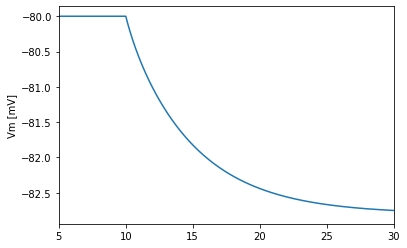

In [13]:
t_vec, v_vec = run(soma) #outputs time and somatic voltage so can plot 
# now, the second axes that shares the x-axis with the ax1
# create the general figure
fig = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec)
plt.ylabel("Vm [mV]")
ax1.set_xlim([5,30])

The Rin is lower with the dendrite but the taus are similar. If Rin decreases shouldn't tau also decrease. Remember tau = Rm x Cm.
Try with the original soma decreasing the Rin (increasing the passive conductance). Remember addition of a dendrite adds membrane which adds Cin.

For simplicity try comparing different size somata 

In [ ]:
#make new soma with different size

In [ ]:
#view results 

#Voltage-Clamp

Aim: To create a ball and stick model to determine our key parameters and examine their effect on the voltage-clamp

Create new soma and attach a single electrode voltage-clamp


In [14]:
soma = mk_soma(20,20)
vc= attach_VC(soma, rs=1)
print(vc[0].amp1, vc[0].amp2, vc[0].amp3)

-80.0 0.0 -80.0


Run the voltage-clamp protocol, clamping the membrane potential at -80mV for 10ms and then step depolarise to 0mV for 100ms.

Done Running


Text(0, 0.5, 'Vm [mV]')

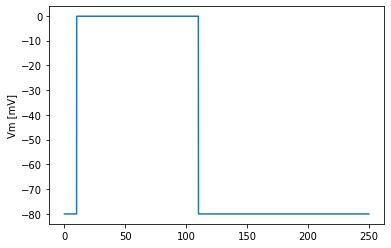

In [15]:
t_vec, v_vec = run(soma)

# create the general figure
fig1 = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec,)
plt.ylabel("Vm [mV]")

###Voltage Error

Is there a voltage error, ie Is Vm clamped to Vcmd?

Done Running


Text(0, 0.5, 'Vm [mV]')

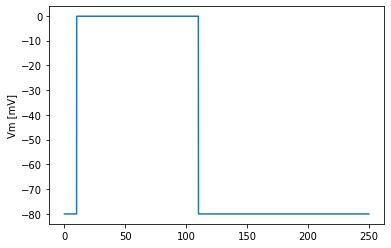

In [16]:
t_vec, v_vec = run(soma) #outputs time and somatic voltage so can plot 

# create the general figure
fig1 = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec,)
plt.ylabel("Vm [mV]")

Our Vcmd is to 0mV, Vm reach 0mV. You may need to change the scale to view. 

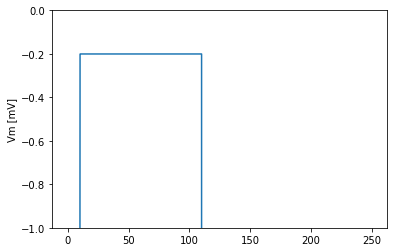

In [17]:
#set axis 
ax1.set_ylim([-1, 0])
fig1

How is the membrane current related to the voltage error?

plot the Im.

Done Running


(-0.1, 1.0)

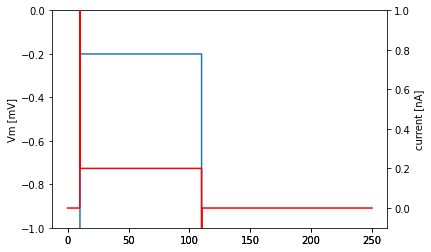

In [18]:
t_vec, v_vec = run(soma) #outputs time and somatic voltage so can plot 
# create the general figure
fig1 = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec)
plt.ylabel("Vm [mV]")
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
current = ax2.plot(t_vec, vc[1],'r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylabel("current [nA]")

#you may need to change scale to see
ax1.set_ylim([-1, 0])
ax2.set_ylim([-0.1, 1])


remember that Voltage error is Rs x I.

###Rs
what is the access or series resistance?

In [19]:
vc[0].rs #MOhms

1.0

Does the voltage error correspond to the Rs?
(Hint Vm1 = V1 - I1*rs)

How would you expect the Rs to affect the voltage error?

Test your prediction by setting new Rs

Done Running


(0.0, 50.0)

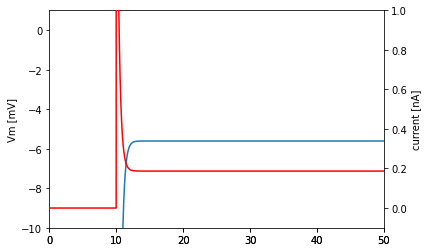

In [20]:
soma = mk_soma(20,20)
vc= attach_VC(soma, rs=30)

t_vec, v_vec = run(soma) #outputs time and somatic voltage so can plot 

# create the general figure
fig1 = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec)
plt.ylabel("Vm [mV]")
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
current = ax2.plot(t_vec, vc[1],'r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylabel("current [nA]")

#you may need to change scale to see
ax1.set_ylim([-10, 1])
ax2.set_ylim([-0.1, 1])

ax1.set_xlim(0,50)

How could you determine your Rs from the measurments

 (hint Rs = Vcmd/I0)

###Rin###
How could you determine the cells Rin from the measurements? (hint Rin = I1/Vcmd-Rs)

What happens if your cell has a leaky membrane or if you add Cs+ to increase Rin?


Done Running


ValueError: ignored

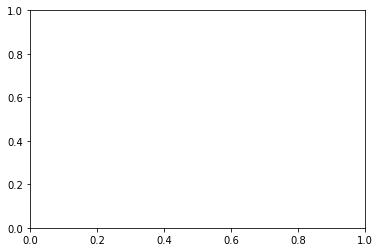

In [5]:
soma = mk_soma(20,20, leak_conductance=1/5000)
vc= attach_VC(soma, rs=30)
t_vec, v_vec = run(soma) #outputs time and somatic voltage so can plot 

# create the general figure
fig1 = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec,)
plt.ylabel("Vm [mV]")
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
current = ax2.plot(t_vec, vc[1],'r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylabel("current [nA]")

#you may need to change scale to see

The more current passing through the memebrane the larger the Voltage error.

###Space-Clamp###
What do you expect to happen to voltage control in the dendrite and Why?


In [15]:
soma = mk_soma(20,20)
vc= attach_VC(soma, rs=30)
dend = attach_dend(soma, 200, 3)


Done Running
25002
25002


(-85.0, 1.0)

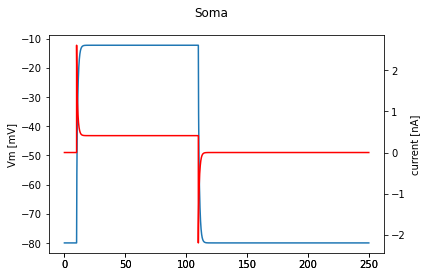

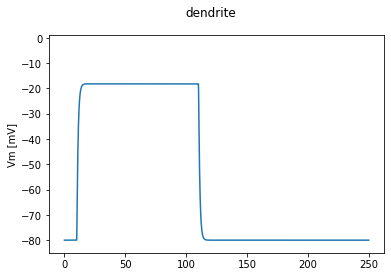

In [16]:
t_vec, v_vec=run(soma)
print(t_vec.size())
print(v_vec.size())

# create the general soma figure
fig1 = plt.figure()
fig1.suptitle('Soma')
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec)
plt.ylabel("Vm [mV]")
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
current = ax2.plot(t_vec, vc[1],'r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylabel("current [nA]") 

# create general dendrite figure
fig2 = plt.figure()
fig2.suptitle('dendrite')
# and the first axes using subplot populated with data 
ax1 = fig2.add_subplot(111)
Vm = ax1.plot(t_vec, dend[1]) #dendritic voltage at 80% distance. Use different length dendrites
plt.ylabel("Vm [mV]")

ax1.set_ylim([-85, 1])

###Active Cell###
So far this has been in a passive cell. What happens to voltage control in an active cell?

In [18]:
#h.nrn_load_dll("F:\\Bonn\\other\\Teaching\\BIGS_Summer_School\\2021\\model\\mod\\nrnmech.dll")
soma = mk_soma(20,20)
dend = attach_dend(soma, 200, 3)
vc= attach_VC(soma, rs=30)
soma.insert('hh')
dend[0].insert('hh')
print(dir(soma(0.5).hh)) # view the variables
soma(0.5).hh.el = -80
soma.ki = 150 #mM #as default ki is 54 mM for squid axon

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'el', 'gk', 'gkbar', 'gl', 'gna', 'gnabar', 'h', 'hinf', 'htau', 'il', 'is_ion', 'm', 'minf', 'mtau', 'n', 'name', 'ninf', 'ntau', 'segment']


Done Running


Text(0, 0.5, 'current [nA]')

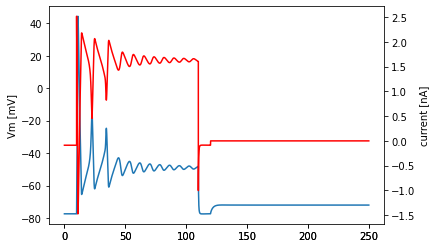

In [19]:
t_vec, v_vec=run(soma)
# create the general figure
fig1 = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec,)
plt.ylabel("Vm [mV]")
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
current = ax2.plot(t_vec, vc[1],'r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylabel("current [nA]")

How would you improve your clamp?

In [21]:
soma = mk_soma(20,20)

#make changes to the parameters to improve your clamp.
soma(0.5).pas.g=1/5000
dend = attach_dend(soma, 200, 3)
vc= attach_VC(soma, rs=30)
soma.insert('hh')
dend[0].insert('hh')
#######################################

print(dir(soma(0.5).hh)) # view the variables
print(soma(0.5).hh.gl)
print(soma(0.5).hh.gnabar)
print(soma(0.5).hh.gkbar)
soma(0.5).hh.el = -80
soma.ki = 150 #mM #as default ki is 54 mM for squid axon

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'el', 'gk', 'gkbar', 'gl', 'gna', 'gnabar', 'h', 'hinf', 'htau', 'il', 'is_ion', 'm', 'minf', 'mtau', 'n', 'name', 'ninf', 'ntau', 'segment']
0.0003
0.12
0.036


Done Running


Text(0, 0.5, 'current [nA]')

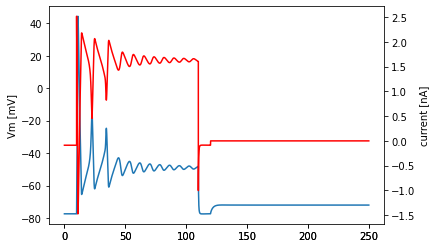

In [22]:
t_vec, v_vec=run(soma)

# create the general figure
fig1 = plt.figure()
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
Vm = ax1.plot(t_vec, v_vec,)
plt.ylabel("Vm [mV]")
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
current = ax2.plot(t_vec, vc[1],'r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylabel("current [nA]")

Make changes that will improve your voltage clamp. eg block leak conductance channels to increase Rin, compensate for Rs, block active channels...

#Conclusions#
The aim of the tutorial was to consolidate the lecture material in an interactive way. In current-clamp you should have a better understanding of basic electirical properties of the cell:  
 - Rin  
 - Cin  
 - tau  

In voltage clamp you should have a better understanding of:  
- voltage clamp error,
- how it is related to current,
- why this is dynamic and
- how to improve the voltage clamp.

**References**  
Neuron simulator: The Neuron Book, Carnevale & Hines 2006 and Neuron website  
Python: Daniel Mueller (Sci Dan) youtube tutorials and [website](https://danielmuellerkomorowska.com/all-posts/)